In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import preprocessing, metrics
%matplotlib inline

In [3]:
## Assigning folder and files to variables
path = "C:/Users/David/OneDrive - Grand Canyon University/DSC540/DataSets"
train_file = "mnist_train.csv"
test_file = "mnist_test.csv"

## Loading datasets
mnist_train = pd.read_csv(path + "/" + train_file)
mnist_test = pd.read_csv(path + "/" + test_file)

## Separating labels from data
y_train = mnist_train['label']
x_train = mnist_train.drop(labels=['label'], axis=1)
y_test = mnist_test['label']
x_test = mnist_test.drop(labels=['label'], axis=1)

## Variables in dataset
print(list(x_train))

['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '1x10', '1x11', '1x12', '1x13', '1x14', '1x15', '1x16', '1x17', '1x18', '1x19', '1x20', '1x21', '1x22', '1x23', '1x24', '1x25', '1x26', '1x27', '1x28', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '2x9', '2x10', '2x11', '2x12', '2x13', '2x14', '2x15', '2x16', '2x17', '2x18', '2x19', '2x20', '2x21', '2x22', '2x23', '2x24', '2x25', '2x26', '2x27', '2x28', '3x1', '3x2', '3x3', '3x4', '3x5', '3x6', '3x7', '3x8', '3x9', '3x10', '3x11', '3x12', '3x13', '3x14', '3x15', '3x16', '3x17', '3x18', '3x19', '3x20', '3x21', '3x22', '3x23', '3x24', '3x25', '3x26', '3x27', '3x28', '4x1', '4x2', '4x3', '4x4', '4x5', '4x6', '4x7', '4x8', '4x9', '4x10', '4x11', '4x12', '4x13', '4x14', '4x15', '4x16', '4x17', '4x18', '4x19', '4x20', '4x21', '4x22', '4x23', '4x24', '4x25', '4x26', '4x27', '4x28', '5x1', '5x2', '5x3', '5x4', '5x5', '5x6', '5x7', '5x8', '5x9', '5x10', '5x11', '5x12', '5x13', '5x14', '5x15', '5x16', '5x17', '5x18', '5x1

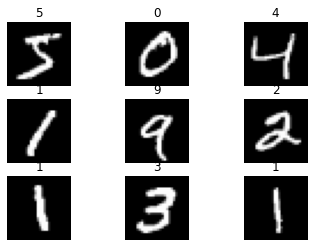

In [4]:
## Visualization
plt.figure
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [5]:
## Data preprocessing
# Normalize using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
transform_train = scaler.fit_transform(x_train)
transform_test = scaler.fit_transform(x_test)
x_train_scaled = pd.DataFrame(transform_train)
x_test_scaled = pd.DataFrame(transform_test)

In [6]:
# ## Euclidean distances between test and train
def euclidean_distance(train, test):
    return sum((train - test) ** 2)


print(euclidean_distance(x_test_scaled.iloc[1].values.reshape(28, 28),
                         x_train_scaled.iloc[1].values.reshape(28, 28)))

[ 0.          0.          0.          0.          0.          0.
  0.7701807   8.20309112  8.13104191 10.92438293 13.05268743 11.80698193
  9.34551326  6.98651288  5.80856594  3.17407151  2.41874664  5.50597463
  5.50797386  7.42551326 12.67338716  9.44453672  4.82517493  1.76962707
  1.54091503  1.53055413  0.59592997  0.        ]


In [7]:
## Creating various models and checking for accuracy
neighbor_1 = knn(n_neighbors=1)
neighbor_3 = knn(n_neighbors=3)
neighbor_5 = knn(n_neighbors=5)
model_1_neighbor = neighbor_1.fit(x_train_scaled, y_train)
model_1_pred = neighbor_1.predict(x_test_scaled)
model_1_accuracy = accuracy_score(y_test, model_1_pred)
model_1_accuracy

0.9691

In [8]:
model_3_neighbor = neighbor_3.fit(x_train_scaled, y_train)
model_3_pred = neighbor_3.predict(x_test_scaled)
model_3_accuracy = accuracy_score(y_test, model_3_pred)
model_3_accuracy

0.9705


In [9]:
model_5_neighbor = neighbor_5.fit(x_train_scaled, y_train)
model_5_pred = neighbor_5.predict(x_test_scaled)
model_5_accuracy = accuracy_score(y_test, model_5_pred)
model_5_accuracy

0.9688


In [20]:
## Classifcation report
print(classification_report(y_test, model_3_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [11]:
## Finding neighbors
neighbors = model_3_neighbor.kneighbors(x_test_scaled.iloc[1].values.reshape(1,-1), n_neighbors=3)
print(neighbors)

(array([[4.59493332, 4.90273946, 5.07400311]]), array([[28882, 49160, 24612]], dtype=int64))


In [22]:
## Confusion matrix
print(metrics.confusion_matrix(y_test, model_3_pred))

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]


In [13]:
## Predicting the number 1 with model
y_train_1 = (y_train==1)
y_train_1 = y_train_1.astype(int)
y_test_1 = (y_test==1)
y_test_1 = y_test_1.astype(int)

fit_1 = model_3_neighbor.fit(x_train_scaled, y_train_1)

In [14]:
#Predicting 1 from random number
predict_1_random = model_3_neighbor.predict(x_test_scaled.iloc[5644].values.reshape(1, -1))
print(predict_1_random)

[0]


In [15]:
predict_1 = model_3_neighbor.predict(x_test_scaled)
accuracy_1 = accuracy_score(y_test_1, predict_1)
y_1_scores = model_3_neighbor.predict_proba(x_test_scaled)
print(accuracy_1)

0.9959


In [16]:
## Cross validation and confusion matrix for prediction of one
y_train_1_cv = cross_val_predict(neighbor_3, x_train_scaled, y_train_1, cv=3)
print(metrics.confusion_matrix(y_train_1, y_train_1_cv))

[[52993   265]
 [   46  6696]]


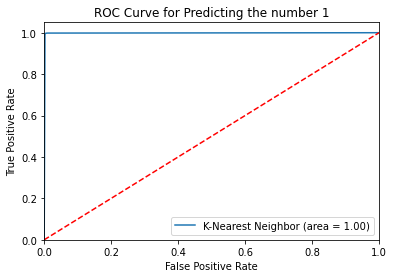

In [17]:
#Generate AUC-ROC curve
y_1_scores_reshape = y_1_scores[:, 1]
knn_roc_auc = roc_auc_score(y_test_1, y_1_scores_reshape)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_1, y_1_scores_reshape)
plt.figure()
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbor (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Predicting the number 1')
plt.legend(loc="lower right")
plt.show()

In [18]:
## Calculate error
error_rate = np.mean(model_3_pred != y_test)
print(error_rate)

0.0295
